In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [3]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)


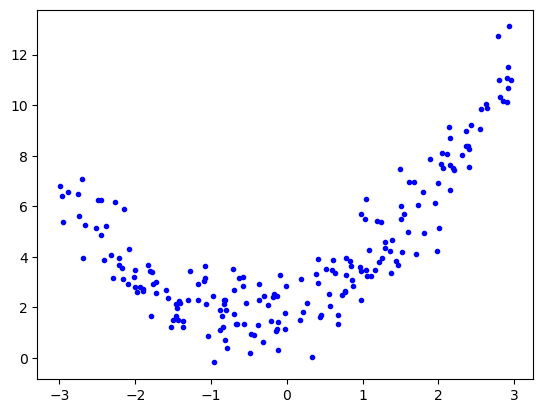

In [7]:
plt.plot(X,y,'b.')

In [9]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [11]:
# Applying linear regression
lr = LinearRegression()

In [13]:
lr.fit(X_train,y_train)

LinearRegression()

In [15]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.28776211054800005

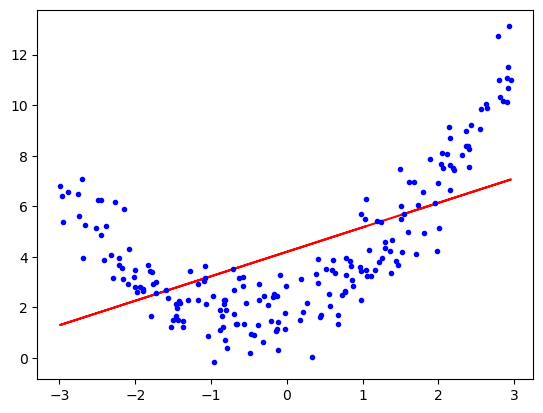

In [17]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")

In [31]:
#Applying polynomial Linear Regression with degree 2
poly=PolynomialFeatures(degree=2)
X_train_trans=poly.fit_transform(X_train)
X_test_trans=poly.transform(X_test)

In [33]:
print(X_train[0])

[1.03695903]


In [35]:
print(X_train_trans[0])

[1.         1.03695903 1.07528404]


In [37]:

lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [39]:
y_pred = lr.predict(X_test_trans)

In [41]:
r2_score(y_test,y_pred)

0.8428512339564549

In [43]:
print(lr.coef_)

[[0.         0.87841198 0.83545181]]


In [45]:
print(lr.intercept_)

[1.87633555]


In [47]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

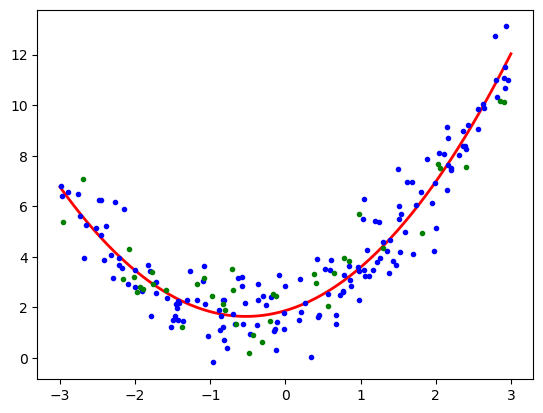

In [49]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')

In [51]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

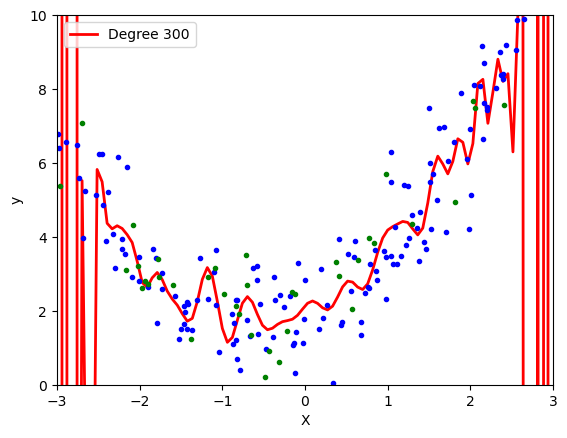

In [53]:
polynomial_regression(300)

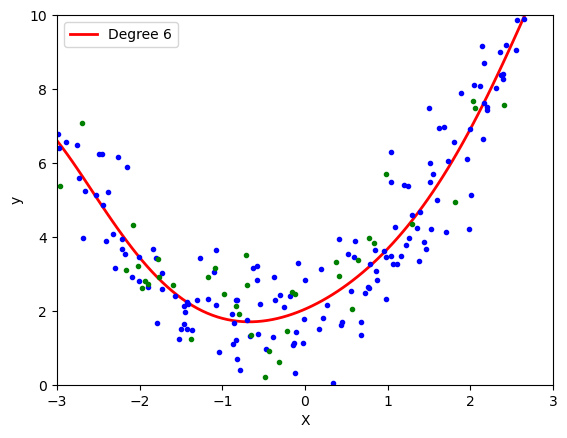

In [63]:
polynomial_regression(6)